In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date = dt.datetime(2011, 5, 31)

results = session.query(Measurement.date).order_by(Measurement.date.desc())

rec_rows = [{"Date":result[0]} for result in results]
rec_rows

[{'Date': '2017-08-23'},
 {'Date': '2017-08-23'},
 {'Date': '2017-08-23'},
 {'Date': '2017-08-23'},
 {'Date': '2017-08-22'},
 {'Date': '2017-08-22'},
 {'Date': '2017-08-22'},
 {'Date': '2017-08-21'},
 {'Date': '2017-08-21'},
 {'Date': '2017-08-21'},
 {'Date': '2017-08-21'},
 {'Date': '2017-08-20'},
 {'Date': '2017-08-20'},
 {'Date': '2017-08-20'},
 {'Date': '2017-08-19'},
 {'Date': '2017-08-19'},
 {'Date': '2017-08-19'},
 {'Date': '2017-08-19'},
 {'Date': '2017-08-18'},
 {'Date': '2017-08-18'},
 {'Date': '2017-08-18'},
 {'Date': '2017-08-18'},
 {'Date': '2017-08-17'},
 {'Date': '2017-08-17'},
 {'Date': '2017-08-17'},
 {'Date': '2017-08-17'},
 {'Date': '2017-08-16'},
 {'Date': '2017-08-16'},
 {'Date': '2017-08-16'},
 {'Date': '2017-08-16'},
 {'Date': '2017-08-15'},
 {'Date': '2017-08-15'},
 {'Date': '2017-08-15'},
 {'Date': '2017-08-15'},
 {'Date': '2017-08-15'},
 {'Date': '2017-08-14'},
 {'Date': '2017-08-14'},
 {'Date': '2017-08-14'},
 {'Date': '2017-08-14'},
 {'Date': '2017-08-14'},


Text(0, 0.5, 'Precipitation')

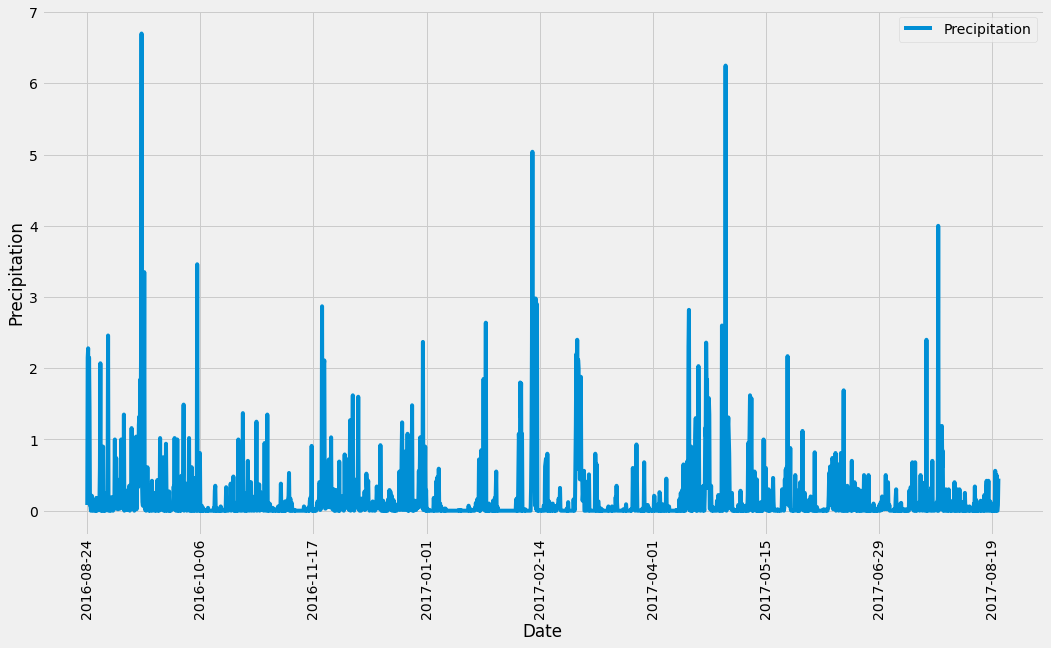

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
# Calculate the date one year from the last date in data set.
year = dt.datetime.strptime(date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df= pd.DataFrame(results, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df= df.dropna()

# Sort the dataframe by date
df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(figsize = (16, 9),sort_columns=True, rot = 45).get_figure()
plt.xticks(rotation=90)
plt.ylabel('Precipitation')


In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()